In [1]:
using Plots, Colors
using PyCall
import Pkg

In [11]:
ENV["PYTHON"] = ""
Pkg.build("PyCall")

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/51cab8e982c5b598eea9c8ceaced4b58d9dd37c9/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9816a3826b0ebf49ab4926e2b18842ad8b5c8f04/build.log`


In [2]:
using Conda

In [19]:
# Conda.runconda(`update -n base -c conda-forge conda`)
# Conda.pip_interop(true)
# Conda.pip("install openai")

┌ Info: Running `conda update -n base -c conda-forge conda` in root environment
└ @ Conda /home/sweet/.julia/packages/Conda/sDjAP/src/Conda.jl:181


Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/sweet/.julia/conda/3/x86_64

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.7.1               |  py310hff52083_0         940 KB  conda-forge
    frozendict-2.4.4           |  py310hc51659f_0          48 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         988 KB

The following NEW packages will be INSTALLED:

  frozendict         conda-forge/linux-64::frozendict-2.4.4-py310hc51659f_0 

The following packages will be UPDATED:

  conda                              24.3.0-py310hff52083_0 --> 24.7.1-py310hff52083_0 


Proceed ([y]/n)? 

In [3]:
include("./fract-coder1.jl")

mandelbrot (generic function with 1 method)

In [4]:
# hyper params
xmin, xmax = -2.0, 1.0 #region of the complex plane visualized
ymin, ymax = -1.5, 1.5 #region of the complex plane visualized
width, height = 800, 600 #resolution
max_iter = 100 #cap the iterations

100

In [5]:
function mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    x = LinRange(xmin, xmax, width)
    y = LinRange(ymin, ymax, height)
    img = Array{Int}(undef, height, width)
    for i in 1:height
        for j in 1:width
            img[i, j] = mandelbrot(complex(x[j], y[i]), max_iter)
        end
    end
    return img
end

mandelbrot_set (generic function with 1 method)

In [6]:
img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter);

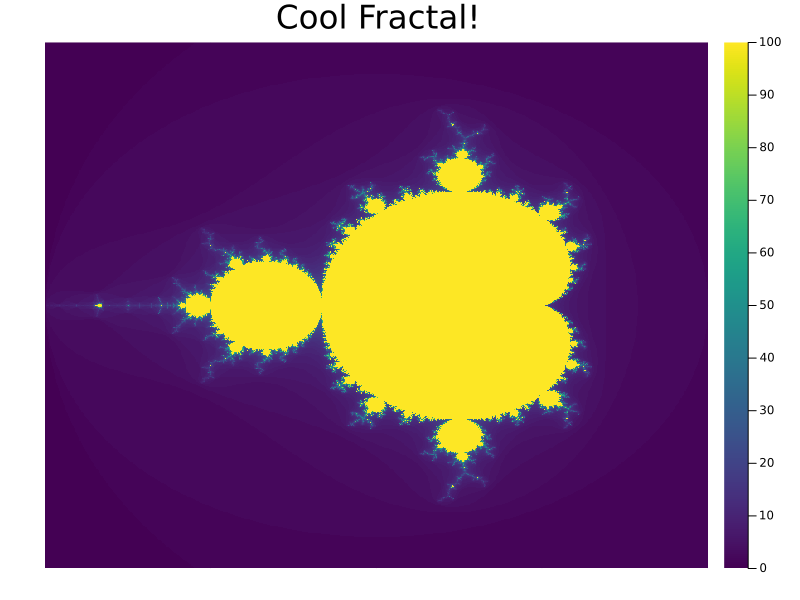

In [7]:
hm = heatmap(img, c=:viridis, color=:viridis, size=(800, 600), axis=false,
             title="Cool Fractal!", titlefontsize=22)

In [8]:
savefig(hm, "./plots/fractal.png")

"/home/sweet/Documents/repos/llmFractal/plots/fractal.png"

In [9]:
ENV["PYTHON"]

KeyError: KeyError: key "PYTHON" not found

In [11]:
py_paths = pyimport("sys").path
println("Python path: ", py_paths)

Python path: ["/home/sweet/.julia/conda/3/x86_64/lib/python310.zip", "/home/sweet/.julia/conda/3/x86_64/lib/python3.10", "/home/sweet/.julia/conda/3/x86_64/lib/python3.10/lib-dynload", "/home/sweet/.julia/conda/3/x86_64/lib/python3.10/site-packages"]


In [12]:
push!(py_paths, ".")

5-element Vector{String}:
 "/home/sweet/.julia/conda/3/x86_64/lib/python310.zip"
 "/home/sweet/.julia/conda/3/x86_64/lib/python3.10"
 "/home/sweet/.julia/conda/3/x86_64/lib/python3.10/lib-dynload"
 "/home/sweet/.julia/conda/3/x86_64/lib/python3.10/site-packages"
 "."

In [10]:
analyze_fractal = pyimport("analyze_fractal")

PyCall.PyError: PyError (PyImport_ImportModule

The Python package analyze_fractal could not be imported by pyimport. Usually this means
that you did not install analyze_fractal in the Python version being used by PyCall.

PyCall is currently configured to use the Julia-specific Python distribution
installed by the Conda.jl package.  To install the analyze_fractal module, you can
use `pyimport_conda("analyze_fractal", PKG)`, where PKG is the Anaconda
package that contains the module analyze_fractal, or alternatively you can use the
Conda package directly (via `using Conda` followed by `Conda.add` etcetera).

Alternatively, if you want to use a different Python distribution on your
system, such as a system-wide Python (as opposed to the Julia-specific Python),
you can re-configure PyCall with that Python.   As explained in the PyCall
documentation, set ENV["PYTHON"] to the path/name of the python executable
you want to use, run Pkg.build("PyCall"), and re-launch Julia.

) <class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'analyze_fractal'")


In [ ]:
# Define a function to call the Python function
function get_fractal_quality(image_path::String, api_key::String)
    quality_score = analyze_fractal.analyze_fractal(image_path, api_key)
    return quality_score
end

# Example usage with your saved image and API key
quality = get_fractal_quality("fractal.png", "your_openai_api_key")
println("Fractal quality: ", quality)

In [15]:

# Import the __main__ module
analyze_fractal = pyimport("__main__")

# Import builtins for executing the script
@pyimport builtins

# Open and read the simplified Python script file
script_content = read("analyze_fractal.py", String)

# Execute the Python script to load its functions into the __main__ module
builtins.exec(script_content)

# Now, try calling the simplified function
try
    quality = analyze_fractal.analyze_fractal("fractal.png", "your_openai_api_key")
    println("Fractal quality: ", quality)
catch e
    println("Error encountered: ", e)
end


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/sweet/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'SystemError'>
SystemError('frame does not exist')
